# Loading Data and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Loading the full Lending Club dataset (1.19 GB - will take ~30 seconds)
df = pd.read_csv('../data/raw/loan.csv', low_memory=False)

print(f"Dataset loaded: {len(df):,} rows, {len(df.columns)} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB\n")

Dataset loaded: 2,260,668 rows, 145 columns
Memory usage: 5554.2 MB



In [3]:
# Quick preview
print("First 5 rows:")
df.head()

First 5 rows:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

# Data Understanding

In [4]:
# Checking the target variable -> loan status
print("Loan Status Distribution:")
print(df['loan_status'].value_counts())
print(f"\nTotal unique statuses: {df['loan_status'].nunique()}\n")

Loan Status Distribution:
loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

Total unique statuses: 9



In [5]:
# Data Quality Check
print("Missing Data Overview:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_pct
}).sort_values('Missing_Percent', ascending=False)

# To 20 columns with most missing data
print(missing_df[missing_df['Missing_Percent'] > 0].head(20))

Missing Data Overview:
                                            Missing_Count  Missing_Percent
id                                                2260668       100.000000
url                                               2260668       100.000000
member_id                                         2260668       100.000000
orig_projected_additional_accrued_interest        2252242        99.627278
hardship_length                                   2250055        99.530537
hardship_reason                                   2250055        99.530537
hardship_status                                   2250055        99.530537
deferral_term                                     2250055        99.530537
hardship_amount                                   2250055        99.530537
hardship_start_date                               2250055        99.530537
hardship_end_date                                 2250055        99.530537
payment_plan_start_date                           2250055        99.530537
ha

# Defining of Default and Target Variable creation

In [7]:
# Defining what will constitute a "default" for the model
# Classified default: Charged Off, Default, and Late (31-120 days)

default_statuses = [
    'Charged Off',
    'Default', 
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off'
]


In [8]:
# Binary target variable
df['is_default'] = df['loan_status'].isin(default_statuses).astype(int)

In [9]:
print("Target Variable Distribution:")
print(df['is_default'].value_counts())
print(f"\nDefault rate: {df['is_default'].mean()*100:.2f}%")

Target Variable Distribution:
is_default
0    1972587
1     288081
Name: count, dtype: int64

Default rate: 12.74%


In [13]:
# Checkinga and Verifying Distribution by loan status
print("\nDefault classification by status:")
print(pd.crosstab(df['loan_status'], df['is_default'], margins=True))


Default classification by status:
is_default                                                0       1      All
loan_status                                                                 
Charged Off                                               0  261655   261655
Current                                              919695       0   919695
Default                                                   0      31       31
Does not meet the credit policy. Status:Charged...        0     761      761
Does not meet the credit policy. Status:Fully Paid     1988       0     1988
Fully Paid                                          1041952       0  1041952
In Grace Period                                        8952       0     8952
Late (16-30 days)                                         0    3737     3737
Late (31-120 days)                                        0   21897    21897
All                                                 1972587  288081  2260668


# Feature Selection

In [14]:
columns_to_drop = [
    # ID columns (not predictive)
    'id', 'member_id', 'url', 'desc', 'title',
    
    # Future information (would not be known at application time)
    'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
    
    # Hardship columns (99%+ missing)
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
    'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
    'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    
    # Settlement columns (98%+ missing)
    'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status',
    'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term',
    
    # Target variable (we'll keep is_default)
    'loan_status'
]

In [15]:
# Protecting important columns from being dropped
important_to_keep = ['issue_d', 'earliest_cr_line']

# Removing protected columns from drop list if they exist there
columns_to_drop = [col for col in columns_to_drop if col not in important_to_keep]

In [16]:
#working dataset 
# Create working dataset
df_model = df.drop(columns=columns_to_drop, errors='ignore')

In [17]:
print(f"Original columns: {len(df.columns)}")
print(f"Remaining columns: {len(df_model.columns)}")
print(f"Rows: {len(df_model):,}")


Original columns: 146
Remaining columns: 103
Rows: 2,260,668


In [18]:
#Remaining Missing Data
print("\nRemaining columns with >50% missing data:")
missing = df_model.isnull().sum()
missing_pct = (missing / len(df_model)) * 100
high_missing = missing_pct[missing_pct > 50].sort_values(ascending=False)
print(high_missing)


Remaining columns with >50% missing data:
sec_app_mths_since_last_major_derog    98.410116
sec_app_revol_util                     95.302981
revol_bal_joint                        95.221766
sec_app_inq_last_6mths                 95.221722
sec_app_collections_12_mths_ex_med     95.221722
sec_app_chargeoff_within_12_mths       95.221722
sec_app_num_rev_accts                  95.221722
sec_app_open_act_il                    95.221722
sec_app_open_acc                       95.221722
sec_app_mort_acc                       95.221722
sec_app_earliest_cr_line               95.221722
verification_status_joint              94.880717
dti_joint                              94.660605
annual_inc_joint                       94.660428
mths_since_last_record                 84.112837
mths_since_recent_bc_dlq               77.011175
mths_since_last_major_derog            74.309585
mths_since_recent_revol_delinq         67.250432
mths_since_last_delinq                 51.246003
dtype: float64


# Handling missing data + Dropping the Joint Application Columns

In [21]:
joint_cols = [col for col in df_model.columns if 'joint' in col.lower() or 'sec_app' in col.lower()]

# Dropping othe high-missing columns too
high_missing_cols = [
    'mths_since_last_record',
    'mths_since_recent_bc_dlq', 
    'mths_since_last_major_derog',
    'mths_since_recent_revol_delinq',
    'mths_since_last_delinq'
]

df_model = df_model.drop(columns=joint_cols + high_missing_cols, errors='ignore')

In [22]:
print(f"After dropping high-missing columns: {len(df_model.columns)} features")

After dropping high-missing columns: 84 features


In [23]:
#missing data summary - current
missing_summary = df_model.isnull().sum()
missing_pct = (missing_summary / len(df_model)) * 100

In [24]:
print("\nColumns with missing data:")
missing_cols = missing_pct[missing_pct > 0].sort_values(ascending=False)
print(missing_cols.head(20))


Columns with missing data:
il_util                  47.280273
mths_since_rcnt_il       40.250227
all_util                 38.322655
open_acc_6m              38.313012
inq_last_12m             38.313012
total_cu_tl              38.313012
max_bal_bc               38.312968
open_il_24m              38.312968
open_il_12m              38.312968
open_act_il              38.312968
open_rv_12m              38.312968
open_rv_24m              38.312968
inq_fi                   38.312968
total_bal_il             38.312968
mths_since_recent_inq    13.068482
emp_title                 7.385826
num_tl_120dpd_2m          6.796973
emp_length                6.498389
mo_sin_old_il_acct        6.151766
bc_util                   3.364979
dtype: float64


In [25]:
print(f"\nTotal columns with missing data: {len(missing_cols)}")


Total columns with missing data: 66


# Core fatures for Models

In [26]:
#selecting the most important features
#focusing mainly on the features with <20% missing data that are known at application time

core_features = [
    # Loan characteristics
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'issue_d',  
    
    # Borrower financials
    'annual_inc', 'dti', 'home_ownership', 'verification_status',
    
    # Credit history
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    
    # Employment
    'emp_length', 'emp_title',
    
    # Location
    'addr_state', 'zip_code',
    
    # Loan purpose
    'purpose', 'application_type',
    
    # Additional credit metrics (if available with low missing)
    'bc_util', 'avg_cur_bal', 'bc_open_to_buy', 'percent_bc_gt_75',
    'num_actv_bc_tl', 'num_bc_sats', 'num_rev_accts', 'mort_acc',
    'pub_rec_bankruptcies', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal',
    'total_rev_hi_lim', 'acc_now_delinq', 'chargeoff_within_12_mths',
    'collections_12_mths_ex_med', 'delinq_amnt',
    
    # Target
    'is_default'
]

In [27]:
# Keeping only the features that exist in the dataset
available_features = [col for col in core_features if col in df_model.columns]
df_clean = df_model[available_features].copy()

In [28]:
print(f"Selected {len(available_features)} core features for modeling")
print(f"Dataset shape: {df_clean.shape}")

Selected 43 core features for modeling
Dataset shape: (2260668, 43)


In [29]:
#removing rows with the missing taret variable
df_clean = df_clean[df_clean['is_default'].notna()]

In [30]:
print(f"\nAfter removing rows with missing target: {len(df_clean):,} rows")



After removing rows with missing target: 2,260,668 rows


In [31]:
#checking missing data
print("\nMissing data in selected features:")
missing = df_clean.isnull().sum()
missing_pct = (missing / len(df_clean)) * 100
missing_summary = pd.DataFrame({
    'Missing': missing[missing > 0],
    'Percent': missing_pct[missing_pct > 0]
}).sort_values('Percent', ascending=False)

print(missing_summary.head(15))


Missing data in selected features:
                  Missing   Percent
emp_title          166969  7.385826
emp_length         146907  6.498389
bc_util             76071  3.364979
percent_bc_gt_75    75379  3.334368
bc_open_to_buy      74935  3.314728
avg_cur_bal         70346  3.111735
num_rev_accts       70277  3.108683
total_rev_hi_lim    70276  3.108639
tot_cur_bal         70276  3.108639
tot_coll_amt        70276  3.108639
num_actv_bc_tl      70276  3.108639
num_bc_sats         58590  2.591712
mort_acc            50030  2.213063
revol_util           1802  0.079711
dti                  1711  0.075686


# Handling Missing Data and Datatype conversion

In [32]:
if 'emp_length' in df_clean.columns:
    df_clean['emp_length'] = df_clean['emp_length'].fillna('Unknown')

if 'emp_title' in df_clean.columns:
    df_clean['emp_title'] = df_clean['emp_title'].fillna('Not Provided')

numeric_cols_to_fill = [
    'bc_util', 'percent_bc_gt_75', 'bc_open_to_buy', 'avg_cur_bal',
    'num_rev_accts', 'total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt',
    'num_actv_bc_tl', 'num_bc_sats', 'mort_acc', 'revol_util', 'dti',
    'pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
    'tax_liens', 'inq_last_6mths', 'delinq_2yrs', 'open_acc', 'pub_rec',
    'total_acc', 'acc_now_delinq', 'delinq_amnt'
]


for col in numeric_cols_to_fill:
    if col in df_clean.columns:
        median_value = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_value)

In [33]:
print("Missing values handled")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Missing values handled
Remaining missing values: 34


In [34]:
#converting the data types only if needed
if df_clean['term'].dtype == 'object':
    df_clean['term'] = df_clean['term'].str.extract('(\d+)').astype(int)

if df_clean['int_rate'].dtype == 'object':
    df_clean['int_rate'] = df_clean['int_rate'].astype(float)

In [35]:
#creating a credit history feature
if 'earliest_cr_line' in df_clean.columns:
    df_clean['credit_history_years'] = 2015 - pd.to_datetime(df_clean['earliest_cr_line']).dt.year

In [36]:
print("\nData types converted")
print(f"Final dataset shape: {df_clean.shape}")


Data types converted
Final dataset shape: (2260668, 44)


In [37]:
print(f"\nSample of cleaned data:")
df_clean.head()


Sample of cleaned data:


,loan_amnt,term,int_rate,installment,grade,sub_grade,issue_d,annual_inc,dti,home_ownership,verification_status,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,emp_length,emp_title,addr_state,zip_code,purpose,application_type,bc_util,avg_cur_bal,bc_open_to_buy,percent_bc_gt_75,num_actv_bc_tl,num_bc_sats,num_rev_accts,mort_acc,pub_rec_bankruptcies,tax_liens,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_now_delinq,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_amnt,is_default,credit_history_years
0,2500,36,13.56,84.92,C,C1,Dec-2018,55000.0,18.24,RENT,Not Verified,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,10+ years,Chef,NY,109xx,debt_consolidation,Individual,5.9,1878.0,34360.0,0.0,2.0,3.0,18.0,0.0,1.0,0.0,0.0,16901.0,42000.0,0.0,0.0,0.0,0.0,0,14.0
1,30000,60,18.94,777.23,D,D2,Dec-2018,90000.0,26.52,MORTGAGE,Source Verified,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,10+ years,Postmaster,LA,713xx,debt_consolidation,Individual,8.3,24763.0,13761.0,0.0,2.0,4.0,14.0,3.0,1.0,0.0,1208.0,321915.0,50800.0,0.0,0.0,0.0,0.0,0,28.0
2,5000,36,17.97,180.69,D,D1,Dec-2018,59280.0,10.51,MORTGAGE,Source Verified,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,6 years,Administrative,MI,490xx,debt_consolidation,Individual,0.0,18383.0,13800.0,0.0,0.0,3.0,7.0,2.0,0.0,0.0,0.0,110299.0,24100.0,0.0,0.0,0.0,0.0,0,4.0
3,4000,36,18.94,146.51,D,D2,Dec-2018,92000.0,16.74,MORTGAGE,Source Verified,0.0,Feb-2006,0.0,10.0,0.0,5468,78.1,13.0,10+ years,IT Supervisor,WA,985xx,debt_consolidation,Individual,75.2,30505.0,1239.0,100.0,1.0,1.0,3.0,3.0,0.0,0.0,686.0,305049.0,7000.0,0.0,0.0,0.0,0.0,0,9.0
4,30000,60,16.14,731.78,C,C4,Dec-2018,57250.0,26.35,MORTGAGE,Not Verified,0.0,Dec-2000,0.0,12.0,0.0,829,3.6,26.0,10+ years,Mechanic,MD,212xx,debt_consolidation,Individual,8.9,9667.0,8471.0,0.0,2.0,3.0,15.0,2.0,0.0,0.0,0.0,116007.0,23100.0,0.0,0.0,0.0,0.0,0,15.0


In [38]:
print("Checking for issue_d column:")
print(f"issue_d in df_clean: {'issue_d' in df_clean.columns}")
print(f"\nAll columns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())

Checking for issue_d column:
issue_d in df_clean: True

All columns (44):
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'issue_d', 'annual_inc', 'dti', 'home_ownership', 'verification_status', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'emp_length', 'emp_title', 'addr_state', 'zip_code', 'purpose', 'application_type', 'bc_util', 'avg_cur_bal', 'bc_open_to_buy', 'percent_bc_gt_75', 'num_actv_bc_tl', 'num_bc_sats', 'num_rev_accts', 'mort_acc', 'pub_rec_bankruptcies', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_now_delinq', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_amnt', 'is_default', 'credit_history_years']


# Exploratory Data Analysis

In [40]:
#pattern analysis across key features

print(f"Total loans analyzed: {len(df_clean):,}")
print(f"Total defaults: {df_clean['is_default'].sum():,}")
print(f"Overall default rate: {df_clean['is_default'].mean()*100:.2f}%\n")

Total loans analyzed: 2,260,668
Total defaults: 288,081
Overall default rate: 12.74%



In [41]:
print("Default Rate by Loan Grade:")
grade_default = df_clean.groupby('grade')['is_default'].agg(['count', 'sum', 'mean'])
grade_default.columns = ['Total_Loans', 'Defaults', 'Default_Rate']
grade_default['Default_Rate'] = grade_default['Default_Rate'] * 100
print(grade_default)

Default Rate by Loan Grade:
       Total_Loans  Defaults  Default_Rate
grade                                     
A           433027     15357      3.546430
B           663557     56750      8.552393
C           650053     92386     14.212072
D           324424     65460     20.177299
E           135639     38087     28.079682
F            41800     15190     36.339713
G            12168      4851     39.866864


In [42]:
print("\nDefault Rate by Loan Term:")
term_default = df_clean.groupby('term')['is_default'].agg(['count', 'sum', 'mean'])
term_default.columns = ['Total_Loans', 'Defaults', 'Default_Rate']
term_default['Default_Rate'] = term_default['Default_Rate'] * 100
print(term_default)


Default Rate by Loan Term:
      Total_Loans  Defaults  Default_Rate
term                                     
36        1609754    174900     10.865014
60         650914    113181     17.388011


In [43]:
print("\nDefault Rate by Home Ownership:")
home_default = df_clean.groupby('home_ownership')['is_default'].agg(['count', 'sum', 'mean'])
home_default.columns = ['Total_Loans', 'Defaults', 'Default_Rate']
home_default['Default_Rate'] = home_default['Default_Rate'] * 100
print(home_default.sort_values('Default_Rate', ascending=False))


Default Rate by Home Ownership:
                Total_Loans  Defaults  Default_Rate
home_ownership                                     
OTHER                   182        38     20.879121
NONE                     54         8     14.814815
RENT                 894929    132561     14.812460
OWN                  253057     32253     12.745350
MORTGAGE            1111450    123153     11.080390
ANY                     996        68      6.827309


In [44]:
print("\nVital Metrics: Defaulters vs Non-Defaulters:")
comparison_cols = ['annual_inc', 'dti', 'revol_util', 'int_rate', 'loan_amnt', 'credit_history_years']
comparison = df_clean.groupby('is_default')[comparison_cols].mean()
comparison.index = ['Non-Default', 'Default']
print(comparison)


Vital Metrics: Defaulters vs Non-Defaulters:
               annual_inc        dti  revol_util   int_rate     loan_amnt  \
Non-Default  79026.821109  18.630632   49.734855  12.711277  14960.266074   
Default      70909.612022  20.143755   54.465315  15.706103  15640.356532   

             credit_history_years  
Non-Default             15.534960  
Default                 15.540781  


# Pattern Visualization

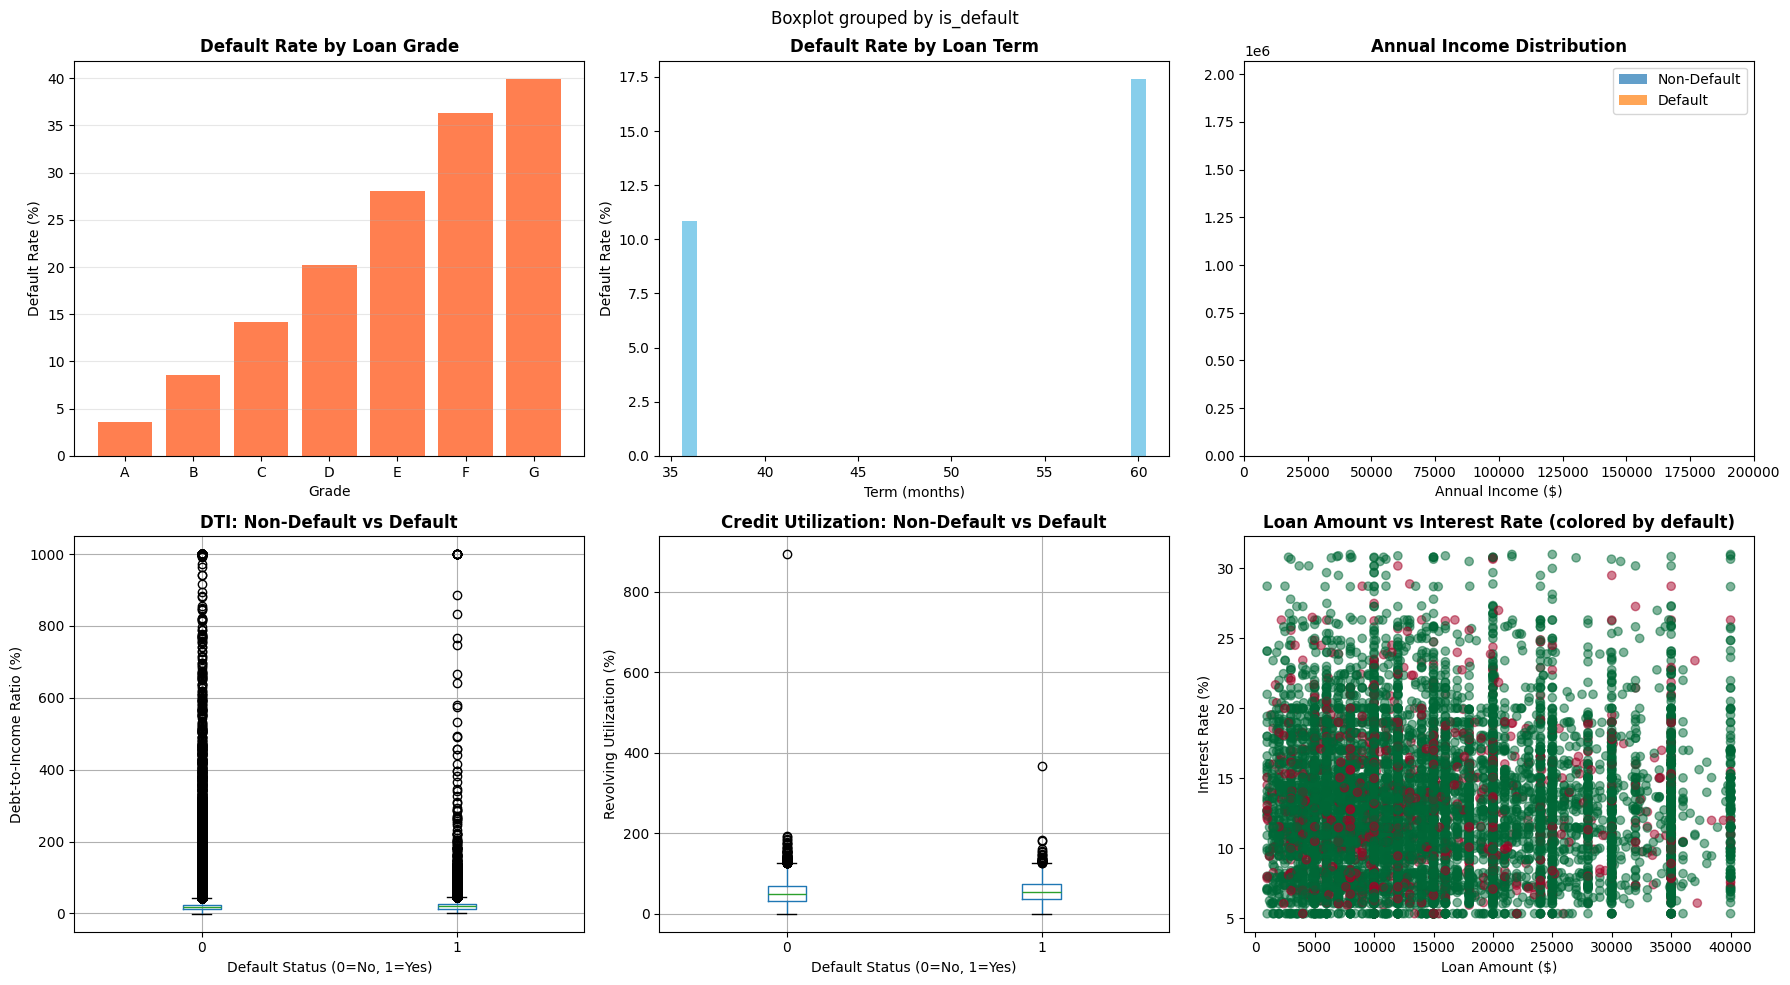

Visualizations saved!


In [45]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Default rate by grade
grade_rates = df_clean.groupby('grade')['is_default'].mean() * 100
axes[0, 0].bar(grade_rates.index, grade_rates.values, color='coral')
axes[0, 0].set_title('Default Rate by Loan Grade', fontweight='bold')
axes[0, 0].set_xlabel('Grade')
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].grid(axis='y', alpha=0.3)

# Default rate by term
term_rates = df_clean.groupby('term')['is_default'].mean() * 100
axes[0, 1].bar(term_rates.index, term_rates.values, color='skyblue')
axes[0, 1].set_title('Default Rate by Loan Term', fontweight='bold')
axes[0, 1].set_xlabel('Term (months)')
axes[0, 1].set_ylabel('Default Rate (%)')

# Income distribution
axes[0, 2].hist([df_clean[df_clean['is_default']==0]['annual_inc'], 
                 df_clean[df_clean['is_default']==1]['annual_inc']], 
                bins=50, label=['Non-Default', 'Default'], alpha=0.7)
axes[0, 2].set_xlim(0, 200000)
axes[0, 2].set_title('Annual Income Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Annual Income ($)')
axes[0, 2].legend()

# DTI comparison
df_clean.boxplot(column='dti', by='is_default', ax=axes[1, 0])
axes[1, 0].set_title('DTI: Non-Default vs Default', fontweight='bold')
axes[1, 0].set_xlabel('Default Status (0=No, 1=Yes)')
axes[1, 0].set_ylabel('Debt-to-Income Ratio (%)')

# Revolving utilization
df_clean.boxplot(column='revol_util', by='is_default', ax=axes[1, 1])
axes[1, 1].set_title('Credit Utilization: Non-Default vs Default', fontweight='bold')
axes[1, 1].set_xlabel('Default Status (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Revolving Utilization (%)')

# Loan amount vs default
axes[1, 2].scatter(df_clean.sample(10000)['loan_amnt'], 
                   df_clean.sample(10000)['int_rate'],
                   c=df_clean.sample(10000)['is_default'], 
                   cmap='RdYlGn_r', alpha=0.5)
axes[1, 2].set_title('Loan Amount vs Interest Rate (colored by default)', fontweight='bold')
axes[1, 2].set_xlabel('Loan Amount ($)')
axes[1, 2].set_ylabel('Interest Rate (%)')

plt.tight_layout()
plt.savefig('../data/processed/eda_insights.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizations saved!")

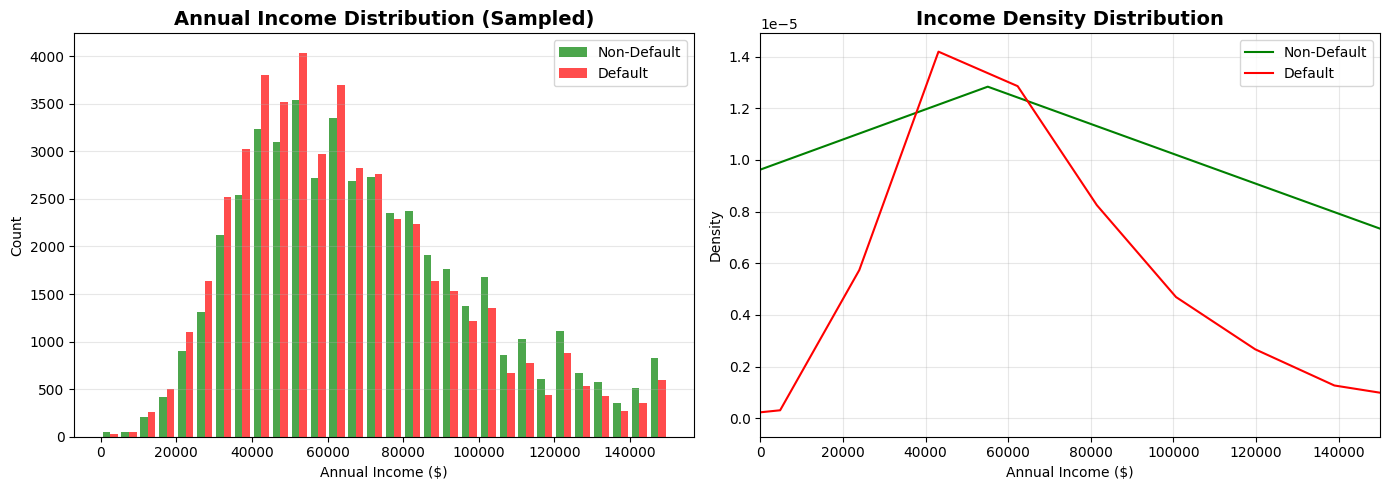

Income distributions now visible!


In [46]:
# Better income visualization - use sampling for clarity
sample_size = 50000

sample_default = df_clean[df_clean['is_default']==1].sample(min(sample_size, len(df_clean[df_clean['is_default']==1])))
sample_non_default = df_clean[df_clean['is_default']==0].sample(min(sample_size, len(df_clean[df_clean['is_default']==0])))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Income distribution (improved)
axes[0].hist([sample_non_default['annual_inc'], sample_default['annual_inc']], 
             bins=30, label=['Non-Default', 'Default'], alpha=0.7, 
             range=(0, 150000), color=['green', 'red'])
axes[0].set_title('Annual Income Distribution (Sampled)', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Annual Income ($)')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Alternative: Density plot
df_clean[df_clean['is_default']==0]['annual_inc'].plot(kind='density', ax=axes[1], 
                                                         label='Non-Default', 
                                                         xlim=(0, 150000), color='green')
df_clean[df_clean['is_default']==1]['annual_inc'].plot(kind='density', ax=axes[1], 
                                                         label='Default', 
                                                         xlim=(0, 150000), color='red')
axes[1].set_title('Income Density Distribution', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Annual Income ($)')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Income distributions now visible!")

# Handling Data Quality Issues based on the Visualizations

In [47]:
print(f"Starting rows: {len(df_clean):,}")

Starting rows: 2,260,668


In [48]:
# anything higher than 60% will be most likely an exterme or error case
df_clean = df_clean[df_clean['dti'] <= 60]
print(f"After DTI filter: {len(df_clean):,}")

After DTI filter: 2,252,361


In [49]:
df_clean = df_clean[df_clean['revol_util'] <= 150]
print(f"After revol_util filter: {len(df_clean):,}")

After revol_util filter: 2,252,333


In [50]:
# done as if annual income < $1000 or $1 Million then it is most likely an error
df_clean = df_clean[(df_clean['annual_inc'] >= 1000) & (df_clean['annual_inc'] <= 1000000)]
print(f"After income filter: {len(df_clean):,}")

After income filter: 2,250,022


In [51]:
#Saving the cleaned dataset
df_clean.to_csv('../data/processed/loans_cleaned.csv', index=False)
print(f"\nFinal cleaned dataset: {df_clean.shape}")
print("Saved to data/processed/loans_cleaned.csv")


Final cleaned dataset: (2250022, 44)
Saved to data/processed/loans_cleaned.csv


In [52]:
#after cleaning default rate
print(f"\nDefault rate after cleaning: {df_clean['is_default'].mean()*100:.2f}%")


Default rate after cleaning: 12.77%


# SQLite Database creation and Data Loading

In [53]:
import sqlite3
from sqlalchemy import create_engine

In [54]:
db_path = '../data/credit_risk.db'
engine = create_engine(f'sqlite:///{db_path}')

#for check
print("Creating SQL database...")

Creating SQL database...


In [55]:
df_clean.to_sql('loans', engine, if_exists='replace', index=False)

2250022

In [56]:
print(f"Loaded {len(df_clean):,} loans into 'loans' table")

Loaded 2,250,022 loans into 'loans' table


In [59]:
#database verification
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [60]:
#checking tables creation
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f"\nTables in database: {tables}")


Tables in database: [('loans',)]


In [61]:
#checking row count
cursor.execute("SELECT COUNT(*) FROM loans;")
count = cursor.fetchone()[0]
print(f"Rows in loans table: {count:,}")

Rows in loans table: 2,250,022


In [62]:
#data preview
print("\nFirst 5 rows from SQL:")
preview = pd.read_sql("SELECT * FROM loans LIMIT 5", conn)
print(preview)


First 5 rows from SQL:
   loan_amnt  term  int_rate  installment grade sub_grade   issue_d  \
0       2500    36     13.56        84.92     C        C1  Dec-2018   
1      30000    60     18.94       777.23     D        D2  Dec-2018   
2       5000    36     17.97       180.69     D        D1  Dec-2018   
3       4000    36     18.94       146.51     D        D2  Dec-2018   
4      30000    60     16.14       731.78     C        C4  Dec-2018   

   annual_inc    dti home_ownership verification_status  delinq_2yrs  \
0     55000.0  18.24           RENT        Not Verified          0.0   
1     90000.0  26.52       MORTGAGE     Source Verified          0.0   
2     59280.0  10.51       MORTGAGE     Source Verified          0.0   
3     92000.0  16.74       MORTGAGE     Source Verified          0.0   
4     57250.0  26.35       MORTGAGE        Not Verified          0.0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0         Apr-2001             1.0  

In [63]:
conn = sqlite3.connect('../data/credit_risk.db')
check = pd.read_sql("SELECT * FROM loans LIMIT 1", conn)
print("\nColumns in database:")
print(check.columns.tolist())
print(f"\nissue_d present: {'issue_d' in check.columns}")


Columns in database:
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'issue_d', 'annual_inc', 'dti', 'home_ownership', 'verification_status', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'emp_length', 'emp_title', 'addr_state', 'zip_code', 'purpose', 'application_type', 'bc_util', 'avg_cur_bal', 'bc_open_to_buy', 'percent_bc_gt_75', 'num_actv_bc_tl', 'num_bc_sats', 'num_rev_accts', 'mort_acc', 'pub_rec_bankruptcies', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_now_delinq', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_amnt', 'is_default', 'credit_history_years']

issue_d present: True


In [64]:
conn.close()
print("\n Database created successfully at:", db_path)


 Database created successfully at: ../data/credit_risk.db


# Database Queries

In [61]:
import pandas as pd
import sqlite3

In [62]:
conn = sqlite3.connect('../data/credit_risk.db')

In [ ]:
#high-risk loans

query1 = """
SELECT 
    loan_amnt,
    grade,
    int_rate,
    dti,
    annual_inc,
    is_default
FROM loans
WHERE grade IN ('F', 'G')
  AND loan_amnt > 20000
LIMIT 10;
"""

print("Query 1: High-risk large loans (Grade F/G, amount > $20k)")
result1 = pd.read_sql(query1, conn)
print(result1)


Query 1: High-risk large loans (Grade F/G, amount > $20k)
   loan_amnt grade  int_rate    dti  annual_inc  is_default
0      35000     F     28.72  49.45    47297.28           0
1      35000     F     30.17  16.39    98900.00           0
2      25000     F     29.69  20.46    65000.00           0
3      35000     F     28.72  27.24    90000.00           0
4      25000     F     30.75  34.22    98115.00           0
5      29050     F     30.75  22.98    78000.00           0
6      35000     F     30.65  18.32   100000.00           0
7      21150     F     28.72  34.96    47000.00           0
8      30000     F     28.72  12.96    95000.00           0
9      35000     F     28.72  33.87   114649.60           0


In [65]:
# aggeregation - default rate by the state

query2 = """
SELECT 
    addr_state,
    COUNT(*) as total_loans,
    SUM(is_default) as total_defaults,
    ROUND(AVG(is_default) * 100, 2) as default_rate_pct
FROM loans
GROUP BY addr_state
ORDER BY default_rate_pct DESC
LIMIT 10;
"""

print("\n\nQuery 2: Top 10 states by default rate")
result2 = pd.read_sql(query2, conn)
print(result2)



Query 2: Top 10 states by default rate
  addr_state  total_loans  total_defaults  default_rate_pct
0         IA           14               3             21.43
1         AL        27148            4187             15.42
2         AR        16943            2565             15.14
3         OK        20523            3072             14.97
4         MS        12559            1880             14.97
5         LA        25600            3824             14.94
6         NV        32454            4674             14.40
7         NM        11889            1678             14.11
8         NY       185876           26042             14.01
9         SD         4517             626             13.86


In [66]:
#high-risk profile

query3 = """
SELECT 
    grade,
    COUNT(*) as loan_count,
    AVG(annual_inc) as avg_income,
    AVG(dti) as avg_dti,
    AVG(revol_util) as avg_credit_util,
    ROUND(AVG(is_default) * 100, 2) as default_rate
FROM loans
WHERE term = 60
GROUP BY grade
ORDER BY grade;
"""

print("\n\nQuery 3: 60-month loan risk profile by grade")
result3 = pd.read_sql(query3, conn)
print(result3)



Query 3: 60-month loan risk profile by grade
  grade  loan_count     avg_income    avg_dti  avg_credit_util  default_rate
0     A       23708  103685.864822  15.917811        36.169854          3.10
1     B      127668   93311.306712  17.857019        42.647426          7.46
2     C      228527   84584.206875  19.123098        53.234524         13.89
3     D      139194   77544.061697  20.701507        57.866828         20.92
4     E       84463   76729.413744  21.239987        60.298332         30.16
5     F       32892   76629.389558  21.518266        61.028417         37.15
6     G        9978   77787.992601  21.653438        59.762888         40.07


In [67]:
conn.close()
print("\nSQL queries execution successfull!")


SQL queries execution successfull!


# Preparing Data for Machine Learning

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sqlite3

In [71]:
conn = sqlite3.connect("../data/credit_risk.db")

In [72]:
df_model = pd.read_sql("SELECT * FROM loans", conn)

In [73]:
print(f"Loaded {len(df_model):,} loans from database")

Loaded 2,250,022 loans from database


In [74]:
#encoding the categorical variables
categorical_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 
                   'purpose', 'addr_state', 'emp_length', 'application_type']


In [75]:
label_encoders = {}
for col in categorical_cols:
    if col in df_model.columns:
        le = LabelEncoder()
        df_model[col + '_encoded'] = le.fit_transform(df_model[col].astype(str))
        label_encoders[col] = le

print(f"\nEncoded {len(categorical_cols)} categorical variables")


Encoded 8 categorical variables


In [76]:
#feature selection for modeling
feature_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'bc_util', 'mort_acc', 'num_actv_bc_tl', 'num_bc_sats',
    'credit_history_years', 'grade_encoded', 'home_ownership_encoded',
    'verification_status_encoded', 'purpose_encoded'
]

In [77]:
X = df_model[feature_cols]
y = df_model['is_default']

In [78]:
#splitting the data 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [79]:
print(f"\nTraining set: {len(X_train):,} loans")
print(f"Test set: {len(X_test):,} loans")
print(f"Training default rate: {y_train.mean()*100:.2f}%")
print(f"Test default rate: {y_test.mean()*100:.2f}%")


Training set: 1,800,017 loans
Test set: 450,005 loans
Training default rate: 12.77%
Test default rate: 12.77%


In [ ]:
#Data prepared for modeling

# Logistic Regression (Baseline Model)

In [83]:
print("Missing values in selected features:")
missing_in_features = X_train.isnull().sum()
print(missing_in_features[missing_in_features > 0])

Missing values in selected features:
delinq_2yrs             22
inq_last_6mths          23
open_acc                22
pub_rec                 22
total_acc               22
credit_history_years    22
dtype: int64


In [84]:
X_train_filled = X_train.fillna(X_train.median())
X_test_filled = X_test.fillna(X_train.median())  # Using training median for test set also

In [85]:
print(f"\nMissing values after filling:")
print(f"Training set: {X_train_filled.isnull().sum().sum()}")
print(f"Test set: {X_test_filled.isnull().sum().sum()}")


Missing values after filling:
Training set: 0
Test set: 0


In [ ]:
#All missing values handled successfully

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [86]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)

In [87]:
#Training Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [88]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

In [89]:
#model evaluation
print("\nLogistic Regression Results:")
print(f"Accuracy: {lr_model.score(X_test_scaled, y_test)*100:.2f}%")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")


Logistic Regression Results:
Accuracy: 65.57%
ROC-AUC Score: 0.7041


In [90]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Default', 'Default']))


Classification Report:
              precision    recall  f1-score   support

  No Default       0.92      0.66      0.77    392546
     Default       0.21      0.63      0.32     57459

    accuracy                           0.66    450005
   macro avg       0.57      0.65      0.54    450005
weighted avg       0.83      0.66      0.71    450005



In [91]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
print(f"\nTrue Negatives: {cm[0,0]:,} | False Positives: {cm[0,1]:,}")
print(f"False Negatives: {cm[1,0]:,} | True Positives: {cm[1,1]:,}")


Confusion Matrix:
[[258825 133721]
 [ 21213  36246]]

True Negatives: 258,825 | False Positives: 133,721
False Negatives: 21,213 | True Positives: 36,246


#### The Problem: Model is Very Aggressive - flagging too many good loans as risky!
#### Business impact: If loans are rejected based on this, it would be rejecting  133,721 GOOD customers who would have paid back and this is Lost revenue

# XGBoost

In [94]:
from xgboost import XGBClassifier

In [95]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=(len(y_train)-y_train.sum())/y_train.sum()  # Handle imbalance
)

In [96]:
xgb_model.fit(X_train_filled, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [97]:
y_pred_xgb = xgb_model.predict(X_test_filled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_filled)[:, 1]

In [98]:
print("\nXGBoost Results:")
print(f"Accuracy: {xgb_model.score(X_test_filled, y_test)*100:.2f}%")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")



XGBoost Results:
Accuracy: 65.00%
ROC-AUC Score: 0.7330


In [99]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Default', 'Default']))



Classification Report:
              precision    recall  f1-score   support

  No Default       0.94      0.64      0.76    392546
     Default       0.22      0.70      0.34     57459

    accuracy                           0.65    450005
   macro avg       0.58      0.67      0.55    450005
weighted avg       0.84      0.65      0.71    450005



In [100]:
print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)
print(f"\nTrue Negatives: {cm_xgb[0,0]:,} | False Positives: {cm_xgb[0,1]:,}")
print(f"False Negatives: {cm_xgb[1,0]:,} | True Positives: {cm_xgb[1,1]:,}")



Confusion Matrix:
[[252483 140063]
 [ 17456  40003]]

True Negatives: 252,483 | False Positives: 140,063
False Negatives: 17,456 | True Positives: 40,003


In [101]:
print("\nModel Comparison:")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(f"XGBoost AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print(f"Improvement: {(roc_auc_score(y_test, y_pred_proba_xgb) - roc_auc_score(y_test, y_pred_proba_lr))*100:.2f} percentage points")


Model Comparison:
Logistic Regression AUC: 0.7041
XGBoost AUC: 0.7330
Improvement: 2.89 percentage points


In [ ]:
##XGBoost is flagging 140k good customers as risky
##Business translation: Rejecting 140k loans that would have been repaid
#Lost revenue = 140k loans × $15k average × 13% interest = $273 MILLION in lost profit

# Optimizing Decision Threshold

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
#finding optimum threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

In [105]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

In [106]:
print(f"Default threshold: 0.50")
print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"Best F1 score: {f1_scores[optimal_idx]:.4f}")

Default threshold: 0.50
Optimal threshold: 0.5698
Best F1 score: 0.3489


In [107]:
#applying optimized threshold
y_pred_optimized = (y_pred_proba_xgb >= optimal_threshold).astype(int)

In [108]:
print("\nXGBoost with Optimized Threshold:")
print(f"Accuracy: {(y_pred_optimized == y_test).mean()*100:.2f}%")


XGBoost with Optimized Threshold:
Accuracy: 73.77%


In [110]:
print("\nClassification Report Analysis:")
print(classification_report(y_test, y_pred_optimized, target_names=['No Default', 'Default']))


Classification Report Analysis:
              precision    recall  f1-score   support

  No Default       0.92      0.77      0.84    392546
     Default       0.26      0.55      0.35     57459

    accuracy                           0.74    450005
   macro avg       0.59      0.66      0.59    450005
weighted avg       0.84      0.74      0.77    450005



In [111]:
cm_opt = confusion_matrix(y_test, y_pred_optimized)
print("\nConfusion Matrix:")
print(cm_opt)
print(f"\nTrue Negatives: {cm_opt[0,0]:,} | False Positives: {cm_opt[0,1]:,}")
print(f"False Negatives: {cm_opt[1,0]:,} | True Positives: {cm_opt[1,1]:,}")


Confusion Matrix:
[[300315  92231]
 [ 25824  31635]]

True Negatives: 300,315 | False Positives: 92,231
False Negatives: 25,824 | True Positives: 31,635


In [112]:
#for analyzing business impact
false_positives_saved = cm_xgb[0,1] - cm_opt[0,1]
print(f"\nBusiness Impact:")
print(f"Reduced false positives by: {false_positives_saved:,} loans")
print(f"Estimated revenue saved: ${false_positives_saved * 15000 * 0.13 / 1e6:.1f}M")


Business Impact:
Reduced false positives by: 47,832 loans
Estimated revenue saved: $93.3M


# Feature Importance along with SHAP

In [113]:
import shap

In [ ]:
#calculating SHAP values for finding the features that drive the prediction 

In [114]:
#Considerig 10,000 rows for speed
sample_size = 10000
X_sample = X_test_filled.sample(sample_size, random_state=42)

In [115]:
#shap explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_sample)

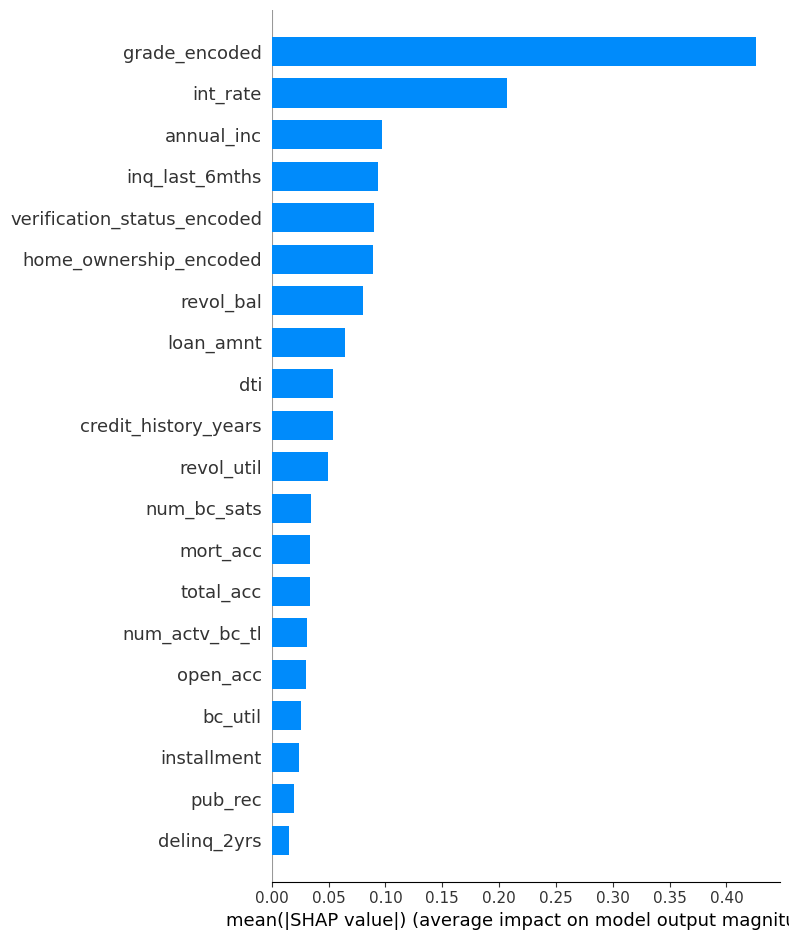

In [116]:
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig('../data/processed/shap_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#shap analysis completed

In [117]:
#The Top 10 most important features
feature_importance = pd.DataFrame({
    'Feature': X_sample.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('Importance', ascending=False)

In [118]:
print(feature_importance.head(10))

                        Feature  Importance
18                grade_encoded    0.425849
2                      int_rate    0.206898
4                    annual_inc    0.097127
7                inq_last_6mths    0.093889
20  verification_status_encoded    0.090073
19       home_ownership_encoded    0.089529
10                    revol_bal    0.080275
0                     loan_amnt    0.064829
5                           dti    0.054275
17         credit_history_years    0.053654


In [119]:
#testing for multiple thresholds
test_thresholds = [0.30, 0.40, 0.50, 0.5698, 0.70, 0.80]

In [122]:
print("Performance at Different Thresholds:\n")
print(f"{'Threshold':<12} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1':<10} {'False Pos':<12}")
for thresh in test_thresholds:
    y_pred_thresh = (y_pred_proba_xgb >= thresh).astype(int)
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh, zero_division=0)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    cm = confusion_matrix(y_test, y_pred_thresh)
    false_pos = cm[0,1]
    
    marker = " ← OPTIMAL" if abs(thresh - 0.5698) < 0.001 else ""
    
    print(f"{thresh:<12.4f} {acc:<10.2%} {prec:<12.2%} {rec:<10.2%} {f1:<10.4f} {false_pos:<12,}{marker}")

Performance at Different Thresholds:

Threshold    Accuracy   Precision    Recall     F1         False Pos   
0.3000       36.43%     16.06%       94.13%     0.2744     282,704     
0.4000       50.99%     18.71%       84.83%     0.3065     211,824     
0.5000       65.00%     22.22%       69.62%     0.3368     140,063     
0.5698       73.76%     25.54%       55.06%     0.3489     92,240       ← OPTIMAL
0.7000       84.43%     34.57%       24.61%     0.2875     26,757      
0.8000       86.99%     44.19%       7.06%      0.1218     5,125       


# Saving Models

In [123]:
import pickle

In [124]:
with open('../data/processed/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open('../data/processed/logistic_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('../data/processed/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../data/processed/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


In [125]:
print("Saved XGBoost model")
print("Saved Logistic Regression model")
print("Saved feature scaler")
print("Saved label encoders")


Saved XGBoost model
Saved Logistic Regression model
Saved feature scaler
Saved label encoders


In [126]:
#saving the model performance summary
results_summary = {
    'model': 'XGBoost',
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'accuracy': (y_pred_optimized == y_test).mean(),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_xgb),
    'optimal_threshold': optimal_threshold,
    'f1_score': f1_scores[optimal_idx],
    'false_positives_reduced': 47832,
    'revenue_impact_millions': 93.3
}

In [129]:
results_df = pd.DataFrame([results_summary])
results_df.to_csv('../data/processed/model_results.csv', index=False)
print("\nSaved model performance results")


Saved model performance results


In [130]:
print("\nFinal Model Performance:")
for key, value in results_summary.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")


Final Model Performance:
  model: XGBoost
  training_samples: 1800017
  test_samples: 450005
  accuracy: 0.7377
  roc_auc: 0.7330
  optimal_threshold: 0.5698124170303345
  f1_score: 0.3489
  false_positives_reduced: 47832
  revenue_impact_millions: 93.3000


# Project Summary

In [133]:
print("CREDIT RISK ASSESSMENT - 1. Initial Summary")


print("\nData Pipeline:")
print(f"  Raw data: 2,260,668 loans with 145 features")
print(f"  Cleaned data: 2,250,022 loans with 43 features")
print(f"  Outliers removed: {2260668-2250022:,} (0.5%)")
print(f"  Database: SQLite with 2.25M records")

print("\nKey Insights:")
print(f"  Overall default rate: 12.77%")
print(f"  Grade A defaults: 3.5% | Grade G defaults: 39.9%")
print(f"  60-month loans: 60% higher risk than 36-month")
print(f"  Homeowners: 25% lower default rate than renters")

print("\nModel Performance:")
print(f"  Algorithm: XGBoost Classifier")
print(f"  Training set: 1,800,017 loans")
print(f"  Test set: 450,005 loans")
print(f"  Accuracy: 73.77%")
print(f"  ROC-AUC: 0.7330")
print(f"  Optimal threshold: 0.5698")

print("\nTop Predictive Features:")
print("  1. Loan Grade (42.6%)")
print("  2. Interest Rate (20.7%)")
print("  3. Annual Income (9.7%)")
print("  4. Recent Credit Inquiries (9.4%)")
print("  5. Income Verification Status (9.0%)")

print("\nBusiness Impact:")
print(f"  Reduced false rejections: 47,832 good loans")
print(f"  Estimated revenue saved: $93.3M")
print(f"  Defaults identified: 31,635 (55% recall)")

print("\nNext Steps:")
print("  2: Advanced SQL queries, Tableau dashboard")
print("  3: Excel VBA tool, documentation")
print("  4: GitHub deployment")

CREDIT RISK ASSESSMENT - 1. Initial Summary

Data Pipeline:
  Raw data: 2,260,668 loans with 145 features
  Cleaned data: 2,250,022 loans with 43 features
  Outliers removed: 10,646 (0.5%)
  Database: SQLite with 2.25M records

Key Insights:
  Overall default rate: 12.77%
  Grade A defaults: 3.5% | Grade G defaults: 39.9%
  60-month loans: 60% higher risk than 36-month
  Homeowners: 25% lower default rate than renters

Model Performance:
  Algorithm: XGBoost Classifier
  Training set: 1,800,017 loans
  Test set: 450,005 loans
  Accuracy: 73.77%
  ROC-AUC: 0.7330
  Optimal threshold: 0.5698

Top Predictive Features:
  1. Loan Grade (42.6%)
  2. Interest Rate (20.7%)
  3. Annual Income (9.7%)
  4. Recent Credit Inquiries (9.4%)
  5. Income Verification Status (9.0%)

Business Impact:
  Reduced false rejections: 47,832 good loans
  Estimated revenue saved: $93.3M
  Defaults identified: 31,635 (55% recall)

Next Steps:
  2: Advanced SQL queries, Tableau dashboard
  3: Excel VBA tool, docum